In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
%matplotlib inline

In [19]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

In [20]:
#General data info
data.head()

,CPU,throughput
0,0.070651,44373.474780
1,0.976907,442996.757953
2,0.952362,434875.867578
3,0.522444,273205.892370
4,0.507021,266587.599064


In [21]:
data.describe()

,CPU,throughput
count,100.000000,100.000000
mean,0.503208,252689.739047
std,0.288193,128155.971076
min,0.001924,1249.384931
25%,0.276605,158732.677129
50%,0.497214,262343.870738
75%,0.724415,354147.576609
max,0.999210,450288.917049


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
CPU           100 non-null float64
throughput    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


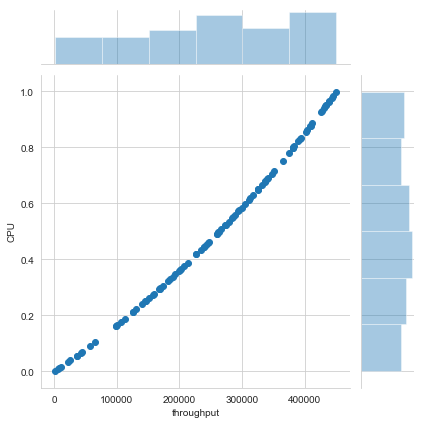

In [23]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


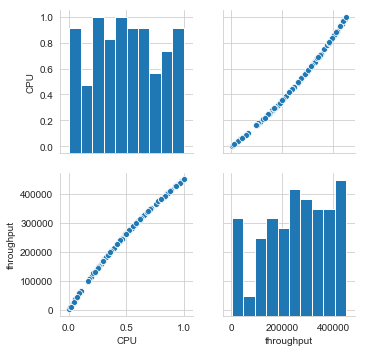

In [24]:
sns.pairplot(data)


In [25]:
data['throughput'].corr(data['CPU'])


0.9954129316792629

In [26]:
datalm = data


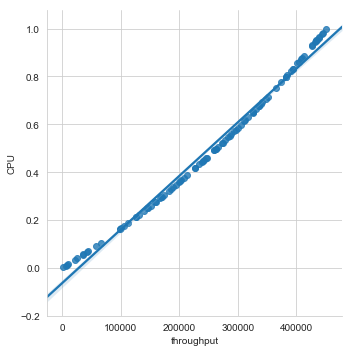

In [27]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [37]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [12]:
print(lm.coef_)


[2.21388856e-06]


In [13]:
#Test data prediction
prediction = lm.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.376114,0.402931
1,0.976907,0.924248
2,0.678113,0.688444
3,0.799695,0.789100
4,0.293646,0.314001
5,0.188297,0.191765
6,0.929758,0.889512
7,0.599248,0.619174
8,0.329697,0.353555
9,0.886397,0.856808


Text(0, 0.5, 'Predicted Y')

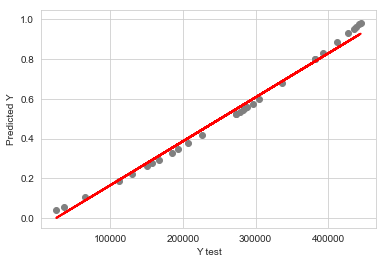

In [14]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [15]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.0258129307432581
MSE: 0.0008261229137046806
RMSE: 0.028742354004233552


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


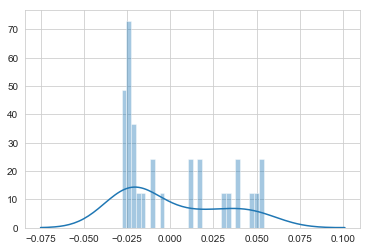

In [16]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [17]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))